<a href="https://colab.research.google.com/github/IdealisticINTJ/My_Machine_Learning_Projects/blob/main/Sentence_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [3]:
sentence = "You are such an annoyance. I want to give you a high-five...in the face, WITH A CHAIR."

In [4]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
sid.polarity_scores(sentence)

{'compound': -0.25, 'neg': 0.147, 'neu': 0.769, 'pos': 0.083}

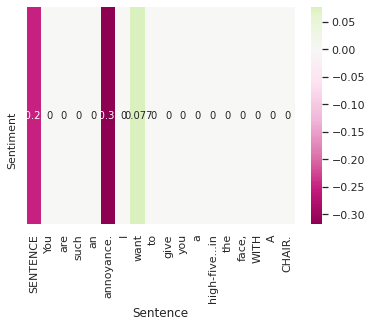

In [6]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

In [7]:
from textblob import TextBlob

In [8]:
TextBlob(sentence).sentiment

Sentiment(polarity=0.0, subjectivity=0.5)

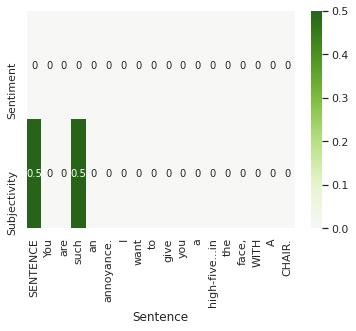

In [9]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

In [10]:
!pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

     |████████████████████████████████| 286kB 19.3MB/s 
     |████████████████████████████████| 983kB 38.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 19.7MB 1.4MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 1.2MB 27.0MB/s 
     |████████████████████████████████| 2.3MB 31.7MB/s 
     |████████████████████████████████| 798kB 36.8MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 3.3MB 23.8MB/s 
     |████████████████████████████████| 901kB 29.6MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9693 sha256=1d56d0edd31201f2fe536ae42cf39c463ba2d7e2ff7423c1a2194218022d44b9
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Succes

100%|██████████| 265512723/265512723 [00:10<00:00, 25554273.36B/s]

2021-06-01 17:14:40,375 copying /tmp/tmp7l4npfkj to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2021-06-01 17:14:40,931 removing temp file /tmp/tmp7l4npfkj
2021-06-01 17:14:41,306 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [11]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

[NEGATIVE (0.9978)]

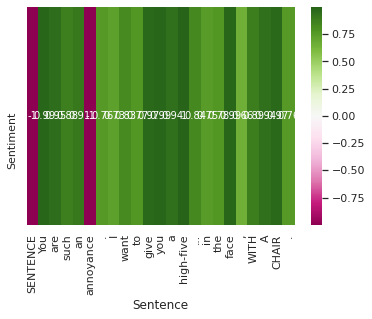

In [12]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

In [13]:
!pip3 install torch==1.0.1 -f https://download.pytorch.org/whl/cpu/stable 
!git clone https://github.com/huggingface/torchMoji
import os
os.chdir('torchMoji')
!pip3 install -e .

Looking in links: https://download.pytorch.org/whl/cpu/stable
     |████████████████████████████████| 560.1MB 23kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.0.1 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.0.1 which is incompatible.
ERROR: flair 0.8.0.post1 has requirement torch<=1.7.1,>=1.5.0, but you'll have torch 1.0.1 which is incompatible.
  Found existing installation: torch 1.7.1
    Uninstalling torch-1.7.1:
      Successfully uninstalled torch-1.7.1


Cloning into 'torchMoji'...
remote: Enumerating objects: 143, done.
remote: Total 143 (delta 0), reused 0 (delta 0), pack-reused 143
Receiving objects: 100% (143/143), 2.41 MiB | 20.58 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Obtaining file:///content/torchMoji
     |████████████████████████████████| 5.0MB 30.8MB/s 
     |████████████████████████████████| 14.1MB 197kB/s 
     |████████████████████████████████| 9.3MB 38.7MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
  Created wheel for emoji: filename=emoji-0.4.5-cp37-none-any.whl size=38198 sha256=82bffec1b088c40644c0a0bbbc7b57b9985b4f6ec6c1cc37baca260835ca3c67
  Stored in directory: /root/.cache/pip/wheels/82/5f/75/d3b84d3c13409f43533b70af38ca20abb09f7ffb0aaf051e33
  ERROR: Failed building wheel for numpy
  Running setup.py clean for numpy
  ERROR: Failed cleaning build dir for numpy
  ERROR: Failed building wheel for scipy
  Running setup.py clean for scipy
  ERROR: Failed cleaning build dir for scipy
  ERROR:

In [14]:
!python3 scripts/download_weights.py

About to download the pretrained weights file from https://www.dropbox.com/s/q8lax9ary32c7t9/pytorch_model.bin?dl=0#
The size of the file is roughly 85MB. Continue? [y/n]
y
Downloading...
Running system call: wget https://www.dropbox.com/s/q8lax9ary32c7t9/pytorch_model.bin?dl=0# -O /content/torchMoji/model/pytorch_model.bin
--2021-06-01 17:20:21--  https://www.dropbox.com/s/q8lax9ary32c7t9/pytorch_model.bin?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/q8lax9ary32c7t9/pytorch_model.bin [following]
--2021-06-01 17:20:21--  https://www.dropbox.com/s/raw/q8lax9ary32c7t9/pytorch_model.bin
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd563ff19199680004e1817e35c.dl.dropboxusercontent.com/cd/0/inline/BPk-OXpmkoLGPOj

In [15]:
!python3 examples/text_emojize.py --text f" {sentence} "

/content/torchMoji/torchmoji/model_def.py:159: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(self.embed.weight.data, a=-0.5, b=0.5)
/content/torchMoji/torchmoji/model_def.py:161: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(t)
/content/torchMoji/torchmoji/model_def.py:163: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  nn.init.orthogonal(t)
/content/torchMoji/torchmoji/model_def.py:165: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(t, 0)
/content/torchMoji/torchmoji/model_def.py:167: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.output_layer[0].weight.data)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.w

In [16]:
import numpy as np
import emoji, json
from torchmoji.global_variables import PRETRAINED_PATH, VOCAB_PATH
from torchmoji.sentence_tokenizer import SentenceTokenizer
from torchmoji.model_def import torchmoji_emojis
  
EMOJIS = ":joy: :unamused: :weary: :sob: :heart_eyes: :pensive: :ok_hand: :blush: :heart: :smirk: :grin: :notes: :flushed: :100: :sleeping: :relieved: :relaxed: :raised_hands: :two_hearts: :expressionless: :sweat_smile: :pray: :confused: :kissing_heart: :heartbeat: :neutral_face: :information_desk_person: :disappointed: :see_no_evil: :tired_face: :v: :sunglasses: :rage: :thumbsup: :cry: :sleepy: :yum: :triumph: :hand: :mask: :clap: :eyes: :gun: :persevere: :smiling_imp: :sweat: :broken_heart: :yellow_heart: :musical_note: :speak_no_evil: :wink: :skull: :confounded: :smile: :stuck_out_tongue_winking_eye: :angry: :no_good: :muscle: :facepunch: :purple_heart: :sparkling_heart: :blue_heart: :grimacing: :sparkles:".split(' ')
model = torchmoji_emojis(PRETRAINED_PATH)
with open(VOCAB_PATH, 'r') as f:
  vocabulary = json.load(f)
st = SentenceTokenizer(vocabulary, 30)

def deepmojify(sentence,top_n =5):
  def top_elements(array, k):
    ind = np.argpartition(array, -k)[-k:]
    return ind[np.argsort(array[ind])][::-1]

  tokenized, _, _ = st.tokenize_sentences([sentence])
  prob = model(tokenized)[0]
  emoji_ids = top_elements(prob, top_n)
  emojis = map(lambda x: EMOJIS[x], emoji_ids)
  return emoji.emojize(f"{sentence} {' '.join(emojis)}", use_aliases=True)

/content/torchMoji/torchmoji/model_def.py:159: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(self.embed.weight.data, a=-0.5, b=0.5)
/content/torchMoji/torchmoji/model_def.py:161: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(t)
/content/torchMoji/torchmoji/model_def.py:163: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  nn.init.orthogonal(t)
/content/torchMoji/torchmoji/model_def.py:165: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(t, 0)
/content/torchMoji/torchmoji/model_def.py:167: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.output_layer[0].weight.data)


In [ ]:
deepmojify(sentence, top_n = 3)